<a href="https://colab.research.google.com/github/wenshanliu-slu0/hds5210-2023/blob/main/week13/week13_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [ ]:
#1.call API from Maryland.gov
#API URL: https://geodata.md.gov/imap/rest/services/Health/MD_LongTermCareAssistedLiving/FeatureServer/6/query?where=1%3D1&outFields=*&outSR=4326&f=json

import requests
import pandas as pd

url = "https://geodata.md.gov/imap/rest/services/Health/MD_LongTermCareAssistedLiving/FeatureServer/6/query?where=1%3D1&outFields=*&outSR=4326&f=json"

try:
    response = requests.get(url)

    # Check if the request status code ==200
    if response.status_code == 200:
        data = response.json()


        #2.read data
        features = data.get('features', [])
        records = [feature.get('attributes', {}) for feature in features]
        df = pd.DataFrame(records)

        #3.show df amount of rows and columns
        print(df)

    else:
        print(f"Error: {response.status_code}")

except requests.exceptions.RequestException as e:
    print(f"Request error: {e}")


     OBJECTID           County  \
0           1         Allegany   
1           2         Allegany   
2           3         Allegany   
3           4         Allegany   
4           5         Allegany   
..        ...              ...   
222       231          Charles   
223       232        Frederick   
224       233           Howard   
225       234       Montgomery   
226       235  Prince George's   

                                      Facility_Name  \
0                 Allegany Health Nursing and Rehab   
1    Devlin Manor Nursing and Rehabilitation Center   
2                                 Egle Nursing Home   
3                Sterling Care at Frostburg Village   
4                      Cumberland Healthcare Center   
..                                              ...   
222                                  Waldorf Center   
223                          Ballenger Creek Center   
224          The Lutheran Village at Miller's Grant   
225                          Ingleside at

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [34]:

# Display the number of unique values in each column
unique_counts = df.nunique()
print("Number of unique values in each column:")
print(unique_counts)

# Find the column with the greatest number of distinct values
max_unique= unique_counts.idxmax()
max_unique_count = unique_counts[max_unique]

# Exclude the column which is a unique identifier

if max_unique_count == 227:

    # Exclude the column with the maximum unique count
    unique_counts = unique_counts[unique_counts < 227]

    max_unique_column = unique_counts.idxmax()
    max_unique_count = unique_counts[max_unique_column]


print("The column with the greatest number of unique values: " + str(max_unique_column))
print("Number of unique values: " + str(max_unique_count))

Number of unique values in each column:
OBJECTID            227
County               25
Facility_Name       227
Facility_Address    227
Facility_City        92
Facility_State        1
Facility_Zip        123
Facility_Phone      227
License_Capacity    125
OHCQ_Index_No_      216
XCoordinate         223
YCoordinate         225
dtype: int64
The column with the greatest number of unique values: YCoordinate
Number of unique values: 225


italicized text### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [45]:
import pandas as pd

same_value_columns = df.columns[df.nunique() == 1]

same_value_columns =str(same_value_columns)

if len(same_value_columns) >0:
  print("The column which the value for every row is the same:" +same_value_columns)
else:
  print("There is no data has the same value ")


The column which the value for every row is the same:Index(['Facility_State'], dtype='object')




### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

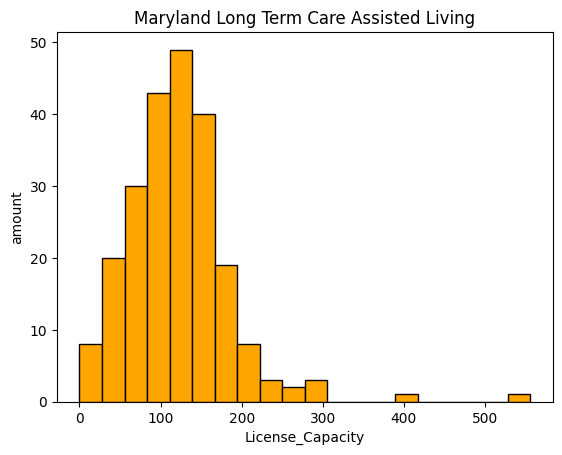

In [47]:
# Use histogram to show the amount of capacity of Maryland State long term care facility
import pandas as pd
import matplotlib.pyplot as plt

numeric_column_name = 'License_Capacity'

# Plot the histogram
plt.hist(df[numeric_column_name], bins=20, color='orange', edgecolor='black')

# Customize the plot
plt.title(f'Maryland Long Term Care Assisted Living')
plt.xlabel(numeric_column_name)
plt.ylabel('amount')

# Show the plot
plt.show()



### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

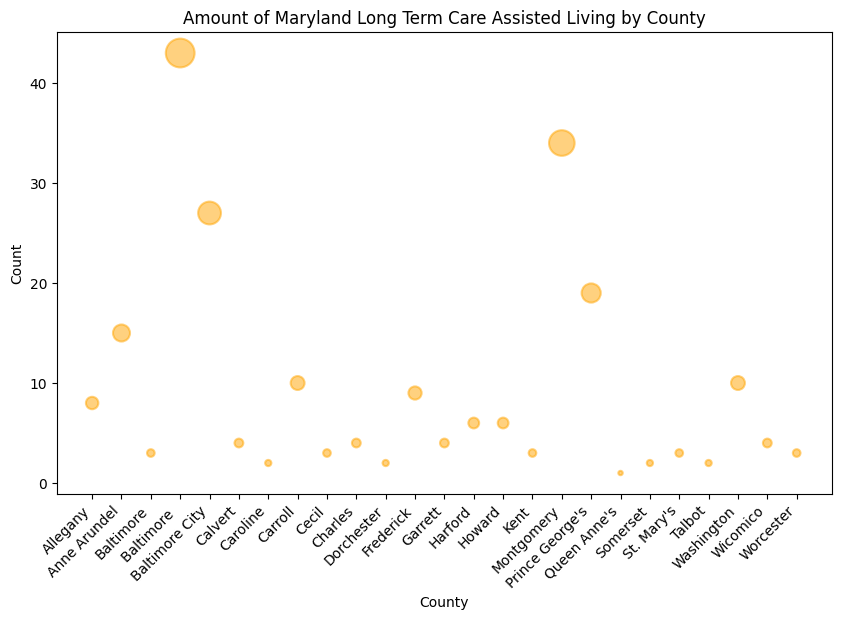

In [48]:
#Use bubble chart to show the amount of Longterm care assisant Facility
# Group by the 'County' column
grouped_df = df.groupby('County').size().reset_index(name='Count')

# Create a bubble chart
labels = grouped_df['County']
sizes = grouped_df['Count']

plt.figure(figsize=(10, 6))
plt.scatter(grouped_df['County'], grouped_df['Count'], s=sizes * 10, alpha=0.5, c='orange',
            linewidths=1.5)

plt.title('Amount of Maryland Long Term Care Assisted Living by County')
plt.xlabel('County')
plt.ylabel('Count')
#rotation the label
plt.xticks(rotation=45, ha='right')
plt.show()



---



## Submitting Your Work

Submit your work as usual.